#### This project involves analyzing inventory cycle count data for an e-commerce company. The goal is to provide insights into inventory accuracy, establish optimal cycle count frequencies, identify discrepancies and recommend actionable improvements. The dataset contains columns for week, product name, inventory count, product ID, quantity and location.

### Project Outline

1. Data Cleaning and Transformation
* Handling missing values and duplicates (identify missing or null values in each column. Find duplicate records and remove them);
* Feature engineering (create new features from existing data).

2. Data Analysis
* Descriptive analysis (compute summary statistics for numerical columns, such as mean, median, and standard deviation);
* Inventory trends (investigate how inventory counts change over time and across different weeks);
* Cycle count frequencies (determine the frequency of cycle counts for various products. Assess if there is a link between cycle count frequency and inventory accuracy);
* Discrepancies and errors (examine discrepancies between inventory counts and actual quantities. Pinpoint products or locations with higher error rates);
* Location-based analysis (evaluate inventory accuracy based on location. Explore correlations between location and cycle count frequency).

3. Data Visualization
* Visualizing key metrics and trends (create bar plot and pie chart to represent the distribution of products and cycle count frequencies).

In [1]:
import pandas as pd

data = pd.read_csv("/Users/kristapsmikuckis/Desktop/Inventory_Cycle_Counting.csv")

In [2]:
null_values = data.isnull().sum()
null_values

Week               0
Product Name       0
Inventory Count    0
Product ID         0
Quantity           0
Location           0
dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Week             2000 non-null   object
 1   Product Name     2000 non-null   object
 2   Inventory Count  2000 non-null   int64 
 3   Product ID       2000 non-null   object
 4   Quantity         2000 non-null   int64 
 5   Location         2000 non-null   object
dtypes: int64(2), object(4)
memory usage: 93.9+ KB


In [4]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [5]:
df = pd.DataFrame(data)
df['Week'] = pd.to_datetime(df['Week'])
df['Week'] = df['Week'].dt.date
print(df)

            Week          Product Name  Inventory Count Product ID  Quantity  \
0     2024-04-28        Wireless Mouse              498     PID000       411   
1     2024-07-07        Wireless Mouse              317     PID000       396   
2     2024-09-22        Wireless Mouse              377     PID000       157   
3     2024-05-12        Wireless Mouse              195     PID000       445   
4     2024-06-16        Wireless Mouse               87     PID000       399   
...          ...                   ...              ...        ...       ...   
1995  2024-07-07  Robot Vacuum Cleaner              447     PID019       431   
1996  2024-04-21  Robot Vacuum Cleaner              113     PID019       178   
1997  2024-08-04  Robot Vacuum Cleaner              112     PID019       468   
1998  2024-08-11  Robot Vacuum Cleaner              410     PID019       420   
1999  2024-10-13  Robot Vacuum Cleaner              467     PID019       285   

        Location  
0      Stuttgart  
1

In [7]:
unique_locations = df['Location'].unique()
warehouse = {loc: f"Warehouse {i+1}" for i, loc in enumerate(unique_locations)}
df['Warehouse'] = df['Location'].map(warehouse)
print(df)

            Week          Product Name  Inventory Count Product ID  Quantity  \
0     2024-04-28        Wireless Mouse              498     PID000       411   
1     2024-07-07        Wireless Mouse              317     PID000       396   
2     2024-09-22        Wireless Mouse              377     PID000       157   
3     2024-05-12        Wireless Mouse              195     PID000       445   
4     2024-06-16        Wireless Mouse               87     PID000       399   
...          ...                   ...              ...        ...       ...   
1995  2024-07-07  Robot Vacuum Cleaner              447     PID019       431   
1996  2024-04-21  Robot Vacuum Cleaner              113     PID019       178   
1997  2024-08-04  Robot Vacuum Cleaner              112     PID019       468   
1998  2024-08-11  Robot Vacuum Cleaner              410     PID019       420   
1999  2024-10-13  Robot Vacuum Cleaner              467     PID019       285   

        Location     Warehouse  
0     

In [13]:
import numpy as np

numerical_summary = df.describe(include=[np.number])
print(numerical_summary.round(2))
mean_inventory_count = df['Inventory Count'].mean()
median_quantity = df['Quantity'].median()
std_quantity = df['Quantity'].std()
print(f"Standard Deviation of Quantity: {std_quantity:.2f}")

       Inventory Count  Quantity
count          2000.00   2000.00
mean            274.97    274.77
std             127.49    128.77
min              50.00     50.00
25%             167.00    164.00
50%             274.00    276.00
75%             385.00    385.00
max             499.00    499.00
Standard Deviation of Quantity: 128.77


In [15]:
grouped = df.groupby('Location').apply(lambda x: x.sort_values('Week')).reset_index(drop=True)
grouped['Weekly Change'] = grouped.groupby('Location')['Inventory Count'].diff()
grouped['Weekly Change'] = grouped.groupby('Location')['Inventory Count'].diff().astype('Int64')
grouped['Percentage Change'] = grouped.groupby('Location')['Inventory Count'].pct_change() * 100
grouped['Percentage Change'] = grouped['Percentage Change'].map(lambda x: f"{x:.2f}%" if pd.notnull(x) else "NaN")
print(grouped)

            Week                 Product Name  Inventory Count Product ID  \
0     2024-04-21         Robot Vacuum Cleaner              113     PID019   
1     2024-04-21            Drone with Camera              307     PID018   
2     2024-04-21             External SSD 1TB              298     PID012   
3     2024-04-21             External SSD 1TB              452     PID012   
4     2024-04-21              Fitness Tracker              103     PID010   
...          ...                          ...              ...        ...   
1995  2024-10-13  Noise Cancelling Headphones              468     PID007   
1996  2024-10-13              Fitness Tracker              185     PID010   
1997  2024-10-13                 Laptop Stand              272     PID015   
1998  2024-10-13  Noise Cancelling Headphones               55     PID007   
1999  2024-10-13           Smart Home Speaker              209     PID013   

      Quantity   Location    Warehouse  Weekly Change Percentage Change  
0

In [16]:
df['Cycle Count Frequency'] = df.groupby('Product Name')['Product Name'].transform('count')
inventory_std = df.groupby('Product Name')['Inventory Count'].std().rename('Inventory STD').round(2)
analysis_df = df[['Product Name', 'Cycle Count Frequency']].drop_duplicates().set_index('Product Name')
analysis_df = analysis_df.join(inventory_std)
print(analysis_df)

                             Cycle Count Frequency  Inventory STD
Product Name                                                     
Wireless Mouse                                 100         125.62
Bluetooth Headphones                           100         124.85
Portable Charger                               100         126.75
Smartwatch                                     100         121.33
Action Camera                                  100         127.90
LED Desk Lamp                                  100         134.08
E-reader                                       100         122.87
Noise Cancelling Headphones                    100         136.62
Tablet 10 inch                                 100         129.66
Gaming Keyboard                                100         127.02
Fitness Tracker                                100         127.98
USB-C Hub                                      100         127.35
External SSD 1TB                               100         126.81
Smart Home

In [27]:
df['Discrepancy'] = abs(df['Inventory Count'] - df['Quantity'])
df['Error Percentage'] = (df['Discrepancy'] / df['Quantity']) * 100

avg_discrepancy_by_product = df.groupby('Product Name')['Discrepancy'].mean()
avg_error_percentage_by_product = df.groupby('Product Name')['Error Percentage'].mean().map(lambda x: f"{x:.2f}%")
avg_error_percentage_by_location = df.groupby('Location')['Error Percentage'].mean().map(lambda x: f"{x:.2f}%")
avg_discrepancy_by_location = df.groupby('Location')['Discrepancy'].mean().round(2)

print("Average Discrepancies by Product:")
print(avg_discrepancy_by_product)
print("\nAverage Error Percentages by Product:")
print(avg_error_percentage_by_product)

print("\nAverage Discrepancies by Location:")
print(avg_discrepancy_by_location)
print("\nAverage Error Percentages by Location:")
print(avg_error_percentage_by_location)

Average Discrepancies by Product:
Product Name
Action Camera                  133.29
Android TV Stick               140.26
Bluetooth Headphones           148.34
Drone with Camera              143.03
E-reader                       144.80
External SSD 1TB               168.26
Fitness Tracker                140.70
Gaming Keyboard                161.90
LED Desk Lamp                  163.58
Laptop Stand                   164.27
Noise Cancelling Headphones    166.30
Portable Charger               150.80
Robot Vacuum Cleaner           130.61
Smart Home Speaker             148.80
Smart Thermostat               138.43
Smartwatch                     154.34
Tablet 10 inch                 151.14
USB-C Hub                      141.83
Webcam HD                      150.92
Wireless Mouse                 153.57
Name: Discrepancy, dtype: float64

Average Error Percentages by Product:
Product Name
Action Camera                  77.78%
Android TV Stick               69.77%
Bluetooth Headphones           

In [28]:
cycle_count_frequency = df['Location'].value_counts().rename('Cycle Count Frequency')
inventory_variability = df.groupby('Location')['Inventory Count'].std().rename('Inventory STD').round(2)
analysis_df = pd.DataFrame({
    'Inventory STD': inventory_variability,
    'Cycle Count Frequency': cycle_count_frequency
})

print("\nCombined Analysis Data:")
print(analysis_df)

if analysis_df.shape[0] > 1:
    correlation_result = analysis_df.corr().round(2)
    print("\nCorrelation between Cycle Count Frequency and Inventory Variability:")
    print(correlation_result)
else:
    print("\nNot enough data to calculate correlations.")


Combined Analysis Data:
            Inventory STD  Cycle Count Frequency
Berlin             125.48                    219
Cologne            126.42                    208
Dortmund           132.11                    218
Düsseldorf         124.72                    200
Essen              126.16                    198
Frankfurt          131.66                    206
Hamburg            121.31                    185
Leipzig            129.82                    183
Munich             124.73                    193
Stuttgart          126.81                    190

Correlation between Cycle Count Frequency and Inventory Variability:
                       Inventory STD  Cycle Count Frequency
Inventory STD                   1.00                   0.37
Cycle Count Frequency           0.37                   1.00


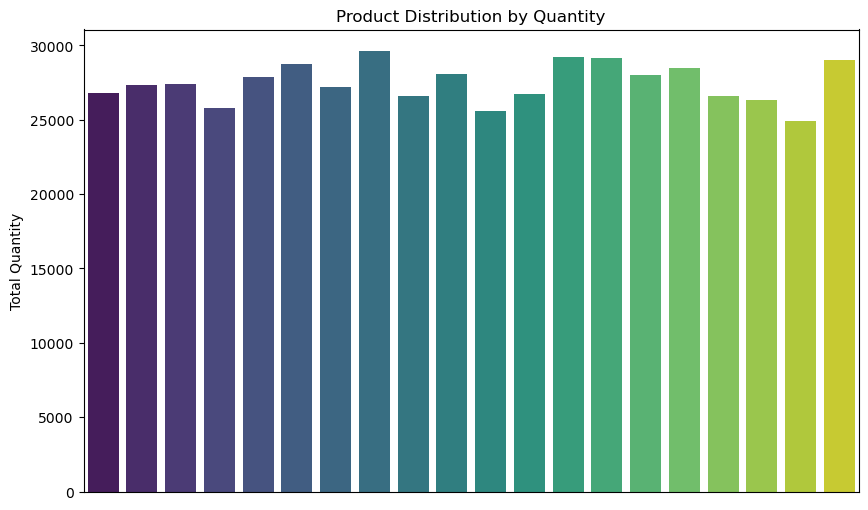

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=product_distribution.index, y=product_distribution.values, palette='viridis')
plt.xticks(ticks=[])
plt.xlabel('')
plt.ylabel('Total Quantity')
plt.title('Product Distribution by Quantity')
plt.show()

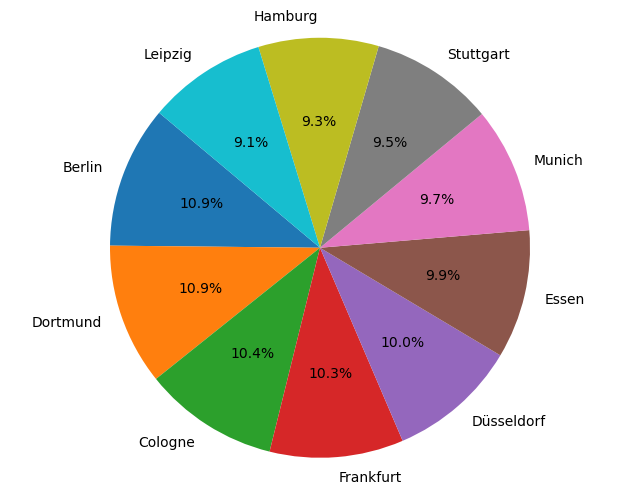

In [33]:
cycle_count_frequency = df['Location'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(cycle_count_frequency, labels=cycle_count_frequency.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()